## pandas



This section provides a brief introduction to pandas. The pandas library is a key component for doing data science in Python for a couple of reasons. Most importantly, it provides two data types, series and data frame, that allow you to store and manipulate data in a way that is useful for analysis. Second, it is incredibly useful for importing and exporting data in a wide variety of formats. Finally, it makes descriptive analysis, including both summary statistics and visualizations. This section provides an introduction to the main capabilities of pandas relevant to data analysis. 

Most of the things that you will want to do it Python require importing libraries. convention, pandas is imported as `pd`. Additionally, we enable the ability for pandas graphics to be displayed within the notebook with `%matplotlib inline`. 

In [1]:
import pandas as pd

### Reading data

In the summer of 2017, the Washington Post produced a [report](https://www.washingtonpost.com/graphics/2018/investigations/unsolved-homicide-database/) on murder clearance rates in U.S. cities. The also released the [data](https://github.com/washingtonpost/data-homicides) they collected on Github as a csv file. We can create a new dataframe, called `df`, using the [pandas](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) `read_csv` method.  

In [7]:
df = pd.read_csv('data/homicide.csv')

In [6]:
df

,uid,reported_date,victim_last,victim_first,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition
0,Alb-000001,20100504,GARCIA,JUAN,Hispanic,78.0,Male,Albuquerque,NM,35.095788,-106.538555,Closed without arrest
1,Alb-000002,20100216,MONTOYA,CAMERON,Hispanic,17.0,Male,Albuquerque,NM,35.056810,-106.715321,Closed by arrest
2,Alb-000003,20100601,SATTERFIELD,VIVIANA,White,15.0,Female,Albuquerque,NM,35.086092,-106.695568,Closed without arrest
3,Alb-000004,20100101,MENDIOLA,CARLOS,Hispanic,32.0,Male,Albuquerque,NM,35.078493,-106.556094,Closed by arrest
4,Alb-000005,20100102,MULA,VIVIAN,White,72.0,Female,Albuquerque,NM,35.130357,-106.580986,Closed without arrest
5,Alb-000006,20100126,BOOK,GERALDINE,White,91.0,Female,Albuquerque,NM,35.151110,-106.537797,Open/No arrest
6,Alb-000007,20100127,MALDONADO,DAVID,Hispanic,52.0,Male,Albuquerque,NM,35.111785,-106.712614,Closed by arrest
7,Alb-000008,20100127,MALDONADO,CONNIE,Hispanic,52.0,Female,Albuquerque,NM,35.111785,-106.712614,Closed by arrest
8,Alb-000009,20100130,MARTIN-LEYVA,GUSTAVO,White,56.0,Male,Albuquerque,NM,35.075380,-106.553458,Open/No arrest
9,Alb-000010,20100210,HERRERA,ISRAEL,Hispanic,43.0,Male,Albuquerque,NM,35.065930,-106.572288,Open/No arrest


By default, `read_csv` assumes a comma separator, but this could be customized by adding the  `sep=` parameter. So a pipe-delimited version of the file could be read with:

~~~python
df = pd.read_csv('data/homicide.psv', sep='|')
~~~

Additionally, read_csv can access file directly from the web.

```python
csv_url = 'https://raw.githubusercontent.com/washingtonpost/data-homicides/master/homicide-data.csv'

df = pd.read_csv(csv_url)
```

Text files may also include special characters, such as 😎 which can be written as `\U0001f60e`

In [4]:
print('\U0001f60e')

😎


In this case, you might need to set the encoding parameter. With most CSV, files, unfortunately, this is usually a process of trial and error:

In [5]:
csv_url = 'https://raw.githubusercontent.com/washingtonpost/data-homicides/master/homicide-data.csv'

df = pd.read_csv(csv_url)

URLError: <urlopen error [Errno 8] nodename nor servname provided, or not known>

In [6]:
df = pd.read_csv(csv_url, encoding='iso-8859-1')

URLError: <urlopen error [Errno 8] nodename nor servname provided, or not known>

In this case, the csv file was not encoding in utf-8, but `iso-8859-1`, also know as `latin1`. According to [someone one the intenet](https://w3techs.com/technologies/overview/character_encoding/all), the most frequently used encodings on the web are:

1. UTF-8 (92% of web pages) - Default for Python 3.x
2. ISO-8859-1 (4%) (`encoding = iso-8859-1` or `encoding = latin1`)
3. Windows-1251 (1%) - Used for Cyrillic script (`encoding = windows-1251`)
4. Windows-1252 (<1%) - Old fork of ISO-8859-1 (`encoding = windows-1252`)
3. Shift JIS (<1%) - Japanese characters  (`encoding = shift-jis`)

You might need to Google around for other langauage specific encodings.

#### Learning about your dataframe

After loading a dataframe, best practice is to get a sense of the data with the `head`, `info` and `describe` methods. `head` shows the first five rows of the dataframe.

In [7]:
df.head()

,uid,reported_date,victim_last,victim_first,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition
0,Alb-000001,20100504,GARCIA,JUAN,Hispanic,78,Male,Albuquerque,NM,35.095788,-106.538555,Closed without arrest
1,Alb-000002,20100216,MONTOYA,CAMERON,Hispanic,17,Male,Albuquerque,NM,35.056810,-106.715321,Closed by arrest
2,Alb-000003,20100601,SATTERFIELD,VIVIANA,White,15,Female,Albuquerque,NM,35.086092,-106.695568,Closed without arrest
3,Alb-000004,20100101,MENDIOLA,CARLOS,Hispanic,32,Male,Albuquerque,NM,35.078493,-106.556094,Closed by arrest
4,Alb-000005,20100102,MULA,VIVIAN,White,72,Female,Albuquerque,NM,35.130357,-106.580986,Closed without arrest


In addition to the data in the csv file, an index has been created to identifiy each row. By default, this is an interger starting with 0. 

If the dataset is wide, middle columns will not be displayed. Also, if text fields are long, only the first few characters will be shown. These can both be adjusted using pandas [display settings](https://pandas.pydata.org/pandas-docs/stable/options.html). 

`info` can be used to explore the data types and the number of non-missing cases for each variable.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52179 entries, 0 to 52178
Data columns (total 12 columns):
uid              52179 non-null object
reported_date    52179 non-null int64
victim_last      52179 non-null object
victim_first     52179 non-null object
victim_race      52179 non-null object
victim_age       52179 non-null object
victim_sex       52179 non-null object
city             52179 non-null object
state            52179 non-null object
lat              52119 non-null float64
lon              52119 non-null float64
disposition      52179 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 4.8+ MB


`describe` provides summary statistics for all the numeric variables. 

In [4]:
df.describe()

,reported_date,victim_age,lat,lon,victim_age_numeric
count,5.217900e+04,49180.000000,52119.000000,52119.000000,49180.000000
mean,2.013090e+07,31.801220,37.026786,-91.471094,31.801220
std,1.123420e+06,14.418692,4.348647,13.746378,14.418692
min,2.007010e+07,0.000000,25.725214,-122.507779,0.000000
25%,2.010032e+07,22.000000,33.765203,-95.997198,22.000000
50%,2.012122e+07,28.000000,38.524973,-87.710286,28.000000
75%,2.015091e+07,40.000000,40.027627,-81.755909,40.000000
max,2.015111e+08,102.000000,45.051190,-71.011519,102.000000


The column headers can be extracted using `keys`.

In [27]:
df.keys()

Index(['uid', 'reported_date', 'victim_last', 'victim_first', 'victim_race',
       'victim_age', 'victim_sex', 'city', 'state', 'lat', 'lon',
       'disposition', 'victim_age_numeric'],
      dtype='object')

If you wanted to look at the bottom of the dataframe, you can use `tail`. Both `head` and `tail` allow you to change the number of rows displayed from the default five.

In [28]:
df.tail(3)

,uid,reported_date,victim_last,victim_first,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition,victim_age_numeric
52176,Was-001382,20161114,WASHINGTON,WILLIE,Black,23.0,Male,Washington,DC,38.828025,-77.002511,Open/No arrest,23.0
52177,Was-001383,20161130,BARNES,MARCUS,Black,24.0,Male,Washington,DC,38.820476,-77.008640,Open/No arrest,24.0
52178,Was-001384,20160901,JACKSON,KEVIN,Black,17.0,Male,Washington,DC,38.866689,-76.982409,Closed by arrest,17.0


`sample` displays random rows from the dataframe.

In [8]:
df.sample(5)

,uid,reported_date,victim_last,victim_first,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition
34260,Mil-000542,20131220,EVANS,REGINALD,Black,21.0,Male,Milwaukee,wI,43.071811,-87.888169,Closed by arrest
35978,NO-000017,20100112,Unknown,Unknown,Black,15.0,Male,New Orleans,LA,30.033230,-90.019913,Open/No arrest
17171,Det-000757,20161012,HATEN,QUASSHIE,Black,23.0,Male,Detroit,MI,42.375000,-83.095565,Closed by arrest
33338,Mia-000394,20120806,CRESPO,RAFAEL ANGEL,Hispanic,59.0,Male,Miami,FL,25.786997,-80.222974,Open/No arrest
33411,Mia-000469,20130902,HYPPOLITE,DEMETRIUS,Black,26.0,Male,Miami,FL,25.791375,-80.198676,Closed without arrest


<div class="alert alert-info">
<h3> Your turn</h3>
<p> Display the first four rows of the dataframe <code>df</code>.  
</div>

In [30]:
df[-3:]

,uid,reported_date,victim_last,victim_first,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition,victim_age_numeric
52176,Was-001382,20161114,WASHINGTON,WILLIE,Black,23.0,Male,Washington,DC,38.828025,-77.002511,Open/No arrest,23.0
52177,Was-001383,20161130,BARNES,MARCUS,Black,24.0,Male,Washington,DC,38.820476,-77.008640,Open/No arrest,24.0
52178,Was-001384,20160901,JACKSON,KEVIN,Black,17.0,Male,Washington,DC,38.866689,-76.982409,Closed by arrest,17.0


### Working with variables


In [31]:
df.head(2)

,uid,reported_date,victim_last,victim_first,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition,victim_age_numeric
0,Alb-000001,20100504,GARCIA,JUAN,Hispanic,78.0,Male,Albuquerque,NM,35.095788,-106.538555,Closed without arrest,78.0
1,Alb-000002,20100216,MONTOYA,CAMERON,Hispanic,17.0,Male,Albuquerque,NM,35.056810,-106.715321,Closed by arrest,17.0


In [32]:
df['victim_age'].describe()

count    49180.000000
mean        31.801220
std         14.418692
min          0.000000
25%         22.000000
50%         28.000000
75%         40.000000
max        102.000000
Name: victim_age, dtype: float64

In [33]:
df['victim_age'].value_counts()

22.0     2116
21.0     2097
23.0     2061
24.0     1995
19.0     1976
20.0     1919
25.0     1906
26.0     1778
18.0     1644
27.0     1582
29.0     1554
28.0     1553
30.0     1432
32.0     1224
31.0     1218
33.0     1124
34.0     1112
17.0     1107
35.0     1047
36.0      934
37.0      869
38.0      838
39.0      762
40.0      744
16.0      715
41.0      688
43.0      675
42.0      659
44.0      613
45.0      606
         ... 
6.0        46
12.0       44
79.0       44
7.0        43
77.0       42
10.0       41
83.0       38
11.0       37
8.0        34
84.0       31
81.0       29
9.0        29
85.0       26
80.0       26
82.0       26
86.0       25
88.0       21
89.0       18
90.0       13
87.0       13
91.0       11
93.0        7
92.0        6
94.0        5
95.0        5
97.0        3
96.0        2
99.0        1
101.0       1
102.0       1
Name: victim_age, Length: 101, dtype: int64

As this has many values, pandas only displays the top and bottom 30 cases. The `values` method can be used to produce an array containing all the values in order.

<div class="alert alert-info">
<h3> Your turn</h3>
<p> Explore the <code>disposition</code> and <code>victim race</code>   columns in the dataframe.  
</div>

All of the values of a specific variables can be extracted.

In [37]:
ages = df['victim_age'].values
len(ages)

52179

In [39]:
first_age = age_values[0]
print(first_age)

78


<div class="alert alert-info">
<h3> Your turn</h3>
<p> Display seven value from the middle of our age variable?

</div>


<div class="alert alert-info">
<h3> Your turn</h3>
<p> A well-known data set is the list of titanic passengers. A version can be found in the data folder called, "titanic.csv". Open the file as a new dataframe <code>titanic_df</code>. How many cases? How many columns? What can you find out about the data?

</div>


#### Plots

pandas also has plotting capabilies, such as histograms (`hist`) and a correlation matrix (`scatter_matrix`).  

In [43]:
%matplotlib inline

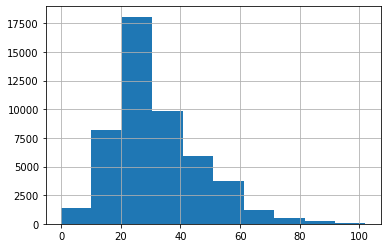

In [42]:
df['victim_age_numeric'].hist()

Plot of individual variables, or series in pandas terminology, are attributes of the data type. That is, you start wit the thing you want plotted, in this case `df['victim_age_numeric']`, and append what you want to do, such as `.hist()`. 

A second type of plots, such as scatter plots, are methods of the dataframe. 

In [41]:
df.plot.scatter(x='lon', y='lat')

You could look at the other dataframe plotting methods on the helpful [pandas visualizations page](https://pandas.pydata.org/pandas-docs/stable/visualization.html). Alternatively, typing tab after `df.plot.` also reveals your options.

<img src="images/auto.png"  width="150px" align="left" /><p>






Want to know about `hexbin`? Again, the help page on the web is useful, but appending a question mark to the end of the command will bring up the documentation. 


```df.plot.hexbin?```

<img src="images/docstring.png" width = "80%" align="left"/>

A third group of plots are part of the pandas plotting library. In these cases, the thing you want plotted is the first, or only, parameter passed, as is the case with the correlation matrix. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126edbb38>,
      dtype=object)

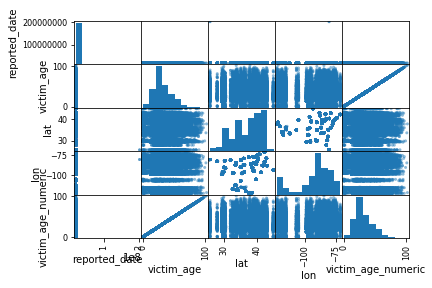

In [44]:
pd.plotting.scatter_matrix(df)

Finally, you can also create subplots using the `by` option. Note that `by` accepts a series, or dataframe column, rather than a column name. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x127800b38>,
      dtype=object)

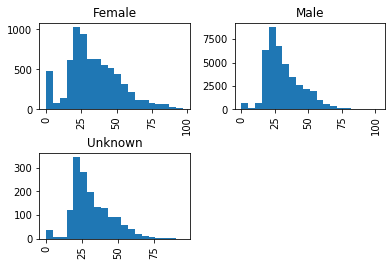

In [45]:
df['victim_age'].hist(by   = df['victim_sex'], 
                              bins = 20)

By default, `by` produces separate x and y scales for each subgraph. This is why it appears to be a relatively large number of deaths of very young females. The numbers between men and women at this age are comparable, but the very large number of male deaths in their 20s results in very different xscales for the graphs. This option can be changed with the `sharex` or `sharey` option. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112254128>,
      dtype=object)

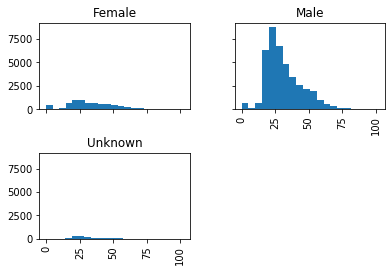

In [46]:
df['victim_age'].hist(by     = df['victim_sex'], 
                              bins   = 20,
                              sharex = True,
                              sharey = True)

#### Other descriptives

Pandas also has a method for producing crosstabs. 

In [47]:
pd.crosstab(df['victim_race'], df['disposition'])

disposition,Closed by arrest,Closed without arrest,Open/No arrest
victim_race,,,
Asian,410,72,203
Black,15462,1496,16403
Hispanic,3332,401,3168
Other,366,30,304
Unknown,2145,320,1734
White,3959,603,1771


Note that since this is a pandas method, and not one of a specific dataframe, you need to be explicit about which datatframe each variable is coming from. That is why the first parameter is not `'victim_race'` but `df['victim_race']`. 

`normalize` can be used to display percentages instead of frequencies. A value of `index` normalized by row, `columns` by column, and `all` by all values.

In [48]:
pd.crosstab(df['victim_race'], df['disposition'], normalize='index')

disposition,Closed by arrest,Closed without arrest,Open/No arrest
victim_race,,,
Asian,0.598540,0.105109,0.296350
Black,0.463475,0.044843,0.491682
Hispanic,0.482829,0.058108,0.459064
Other,0.522857,0.042857,0.434286
Unknown,0.510836,0.076209,0.412955
White,0.625138,0.095216,0.279646


Since this returns a dataframe, it can be saved or plotted.

In [49]:
cross_tab = pd.crosstab(df['victim_race'], df['disposition'], normalize='index')

cross_tab

disposition,Closed by arrest,Closed without arrest,Open/No arrest
victim_race,,,
Asian,0.598540,0.105109,0.296350
Black,0.463475,0.044843,0.491682
Hispanic,0.482829,0.058108,0.459064
Other,0.522857,0.042857,0.434286
Unknown,0.510836,0.076209,0.412955
White,0.625138,0.095216,0.279646


In [50]:
cross_tab.to_csv('data/crosstab.csv')

<div class="alert alert-info">
<h3> Your turn</h3>
<p> In your titanic dataframe, run a crosstab between sex and survived. Anything interesting?

</div>


In order to highlight a meaningful characteristics of the data, you can sort before plotting. 

In [51]:
cross_tab.sort_values(by='Closed by arrest')

disposition,Closed by arrest,Closed without arrest,Open/No arrest
victim_race,,,
Black,0.463475,0.044843,0.491682
Hispanic,0.482829,0.058108,0.459064
Unknown,0.510836,0.076209,0.412955
Other,0.522857,0.042857,0.434286
Asian,0.598540,0.105109,0.296350
White,0.625138,0.095216,0.279646


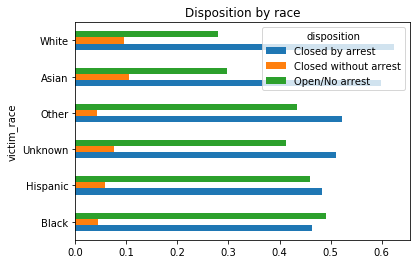

In [52]:
cross_tab.sort_values(by='Closed by arrest').plot(kind   = 'barh',
                                                  title  = 'Disposition by race')

#### Subsets

Similar to a list, a dataframe or series can be sliced to subset the data being shown. For example, `df[:2]` will return the first two rows of the dataframe. (This is identical to `df.head(2)`.)

In [53]:
df[:2]

,uid,reported_date,victim_last,victim_first,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition,victim_age_numeric
0,Alb-000001,20100504,GARCIA,JUAN,Hispanic,78.0,Male,Albuquerque,NM,35.095788,-106.538555,Closed without arrest,78.0
1,Alb-000002,20100216,MONTOYA,CAMERON,Hispanic,17.0,Male,Albuquerque,NM,35.056810,-106.715321,Closed by arrest,17.0


In [54]:
df.head(2)

,uid,reported_date,victim_last,victim_first,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition,victim_age_numeric
0,Alb-000001,20100504,GARCIA,JUAN,Hispanic,78.0,Male,Albuquerque,NM,35.095788,-106.538555,Closed without arrest,78.0
1,Alb-000002,20100216,MONTOYA,CAMERON,Hispanic,17.0,Male,Albuquerque,NM,35.056810,-106.715321,Closed by arrest,17.0


This also works for specific columns.

In [55]:
df['reported_date'][:3]

0    20100504
1    20100216
2    20100601
Name: reported_date, dtype: int64

#### Dates

A new variable can be created from `reported_date` that pandas understands is a date variable using the `to_datetime` method. The format is `%Y%m%d` because the original date is in the "YYYMMDD" format, and `coerce` places missing values where the data can be translated, rather than stopping the variable creation completely. 

In [56]:
df['reported_date'].head()

0    20100504
1    20100216
2    20100601
3    20100101
4    20100102
Name: reported_date, dtype: int64

In [57]:
df['date'] = pd.to_datetime(df['reported_date'], 
                            format='%Y%m%d', 
                            errors='coerce')

In [58]:
df['date'][:3]

0   2010-05-04
1   2010-02-16
2   2010-06-01
Name: date, dtype: datetime64[ns]

From the new series, we can extract specific elements, such as the year.

In [59]:
df['year'] = df['date'].dt.year

As before, `value_counts` and plots can give some sense of the distribution of the values.

In [60]:
df['year'].value_counts()

2016.0    6290
2015.0    5334
2017.0    5048
2012.0    4908
2010.0    4610
2014.0    4608
2013.0    4599
2011.0    4562
2007.0    4268
2008.0    4215
2009.0    3735
Name: year, dtype: int64

Value counts returns a pandas series with an index equal to the original values, in the case the year, and the series values based on the frequency. Since years have an order, it makes sense to sort by the index before plotting them.

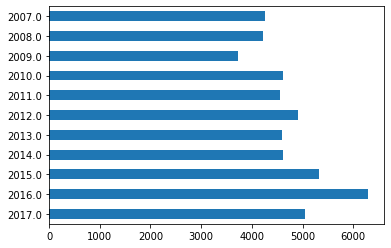

In [61]:
df['year'].value_counts().sort_index(ascending = False).plot(kind='barh')

`crosstab` can also group based on more than one variable for the x or y axis. In that case, you pass a list rather than a single variable or series. To make this clearer, you can create the lists before creating the crosstab.

In [62]:
y_vars = [df['state'], df['city']]
x_vars = df['year']

pd.crosstab(y_vars, x_vars)

year                  2007.0  2008.0  2009.0  2010.0  2011.0  2012.0  2013.0  \
state city                                                                     
AL    Birmingham          92      81      65      58      54      68      64   
      Tulsa                0       0       0       0       0       0       0   
AZ    Phoenix              0       0       0       0     124     126     124   
CA    Fresno              52      40      42      45      35      51      39   
      Long Beach          39      41      42      33      28      34      37   
      Los Angeles          0       0       0     295     298     298     250   
      Oakland              0     119     103      91     101     126      89   
      Sacramento          44      49      31      34      36      34      34   
      San Bernardino       0       0       0       0       0      43      44   
      San Diego           60      53      41      29      38      48      39   
      San Francisco       99      96      45      49      52      69      46   
      Stockton            30      23      34      50      58      71      32   
CO    Denver               0       0       0      38      43      40      42   
DC    Washington         181     186     144     132     108      88     104   
FL    Jacksonville       131     120      99      90      75     100     103   
      Miami               79      64      60      69      71      54      69   
      Tampa                0       0       0      28       0      23      27   
GA    Atlanta            127     105      80      93      88      83      83   
      Savannah            17      22      20      15      25      18      21   
IL    Chicago            445     510     457     434     437     505     423   
IN    Indianapolis       113     114      99      92      96      96     125   
KY    Louisville           0       0       0      52      53      62      48   
LA    Baton Rouge          0       0       0       0      64      67      49   
      New Orleans          0       2       2     186     211     206     157   
MA    Boston              66      66      49      74      64      59      42   
MD    Baltimore          280     234     236     220     197     216     231   
MI    Detroit              0       0       0     310     346     386     337   
MN    Minneapolis         41      35      15      35      35      42      41   
MO    Kansas City         87     119     103     101     111     105     100   
      St. Louis          140     167     146     142     113     112     121   
NC    Charlotte           72      83      55      61      56      51      54   
      Durham              26      24      22      23      27      21      28   
NE    Omaha               41      44      33      33      39      39      40   
NM    Albuquerque          0       0       0      45      38      46      33   
NV    Las Vegas          119     133     121     112      88      81      97   
NY    Buffalo             56      37      61      54      36      50      47   
      New York             0       0       0       0       0       0       0   
OH    Cincinnati          67      76      56      70      66      53      75   
      Columbus            79     108      84     105      90      90      93   
OK    Oklahoma City       67      56      58      48      59      82      62   
      Tulsa               67      56      67      60      54      42      63   
PA    Philadelphia       389     332     304     304     322     333     249   
      Pittsburgh          64      79      44      61      46      43      46   
TN    Memphis            133     137     132      92     116     134     127   
      Nashville           77      74      80      56      55      63      40   
TX    Dallas             194     168     164     147     135     151     139   
      Fort Worth          58      48      44      64      50      45      56   
      Houston            350     293     286     268     198     217     214   


Crosstab returns a dataframe with the column and index names from the values in the original dataset. Since a list was passed, the datatframe has a `MultiIndex`. The can be useful for cases where you have nested data, like cities with states or annual data on multiple countries.

In [63]:
pd.crosstab(y_vars, x_vars).index.names

FrozenList(['state', 'city'])

### Index

In [64]:
df.head()

,uid,reported_date,victim_last,victim_first,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition,victim_age_numeric,date,year
0,Alb-000001,20100504,GARCIA,JUAN,Hispanic,78.0,Male,Albuquerque,NM,35.095788,-106.538555,Closed without arrest,78.0,2010-05-04,2010.0
1,Alb-000002,20100216,MONTOYA,CAMERON,Hispanic,17.0,Male,Albuquerque,NM,35.056810,-106.715321,Closed by arrest,17.0,2010-02-16,2010.0
2,Alb-000003,20100601,SATTERFIELD,VIVIANA,White,15.0,Female,Albuquerque,NM,35.086092,-106.695568,Closed without arrest,15.0,2010-06-01,2010.0
3,Alb-000004,20100101,MENDIOLA,CARLOS,Hispanic,32.0,Male,Albuquerque,NM,35.078493,-106.556094,Closed by arrest,32.0,2010-01-01,2010.0
4,Alb-000005,20100102,MULA,VIVIAN,White,72.0,Female,Albuquerque,NM,35.130357,-106.580986,Closed without arrest,72.0,2010-01-02,2010.0


By default, the index is a series that starts with 0. If your data has unique identifiers, however, it is helpful to use that as the index, especially if you intend on merging your data with other data sources. In this dataframe, each row has a unique value for `uid`.

In [65]:
df.set_index('uid', inplace=True)

In [66]:
df[:5]

,reported_date,victim_last,victim_first,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition,victim_age_numeric,date,year
uid,,,,,,,,,,,,,,
Alb-000001,20100504,GARCIA,JUAN,Hispanic,78.0,Male,Albuquerque,NM,35.095788,-106.538555,Closed without arrest,78.0,2010-05-04,2010.0
Alb-000002,20100216,MONTOYA,CAMERON,Hispanic,17.0,Male,Albuquerque,NM,35.056810,-106.715321,Closed by arrest,17.0,2010-02-16,2010.0
Alb-000003,20100601,SATTERFIELD,VIVIANA,White,15.0,Female,Albuquerque,NM,35.086092,-106.695568,Closed without arrest,15.0,2010-06-01,2010.0
Alb-000004,20100101,MENDIOLA,CARLOS,Hispanic,32.0,Male,Albuquerque,NM,35.078493,-106.556094,Closed by arrest,32.0,2010-01-01,2010.0
Alb-000005,20100102,MULA,VIVIAN,White,72.0,Female,Albuquerque,NM,35.130357,-106.580986,Closed without arrest,72.0,2010-01-02,2010.0


<div class="alert alert-info">
<h3> Your turn</h3>
<p> In your Titanic dataframe, set the index to the <code>PassengerId</code> column. Confirm that it did want you wanted it to do.

</div>


#### Subseting

You can view a subset of a dataframe based on the value of a column. 

Let's say that you wanted to look at the cases where the victim's first name was "Juan". You could create a new series which is either `True` or `False` for each case.

In [67]:
df['victim_first'] == 'JUAN'

uid
Alb-000001     True
Alb-000002    False
Alb-000003    False
Alb-000004    False
Alb-000005    False
Alb-000006    False
Alb-000007    False
Alb-000008    False
Alb-000009    False
Alb-000010    False
Alb-000011    False
Alb-000012    False
Alb-000013    False
Alb-000014    False
Alb-000015    False
Alb-000016    False
Alb-000017    False
Alb-000018    False
Alb-000019    False
Alb-000020    False
Alb-000021    False
Alb-000022    False
Alb-000023    False
Alb-000024    False
Alb-000025    False
Alb-000026    False
Alb-000027    False
Alb-000028    False
Alb-000029    False
Alb-000030    False
              ...  
Was-001353    False
Was-001355    False
Was-001356    False
Was-001357    False
Was-001358    False
Was-001359    False
Was-001360    False
Was-001361    False
Was-001362    False
Was-001363    False
Was-001365    False
Was-001366    False
Was-001367    False
Was-001368    False
Was-001369    False
Was-001370    False
Was-001371    False
Was-001372    False
Was-001373    Fa

You could store this new true/false series. If you placed this in brackets after the name of the dataframe, pandas would display only the rows with a True value.

In [68]:
is_juan = df['victim_first'] == 'JUAN'
df[is_juan]

,reported_date,victim_last,victim_first,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition,victim_age_numeric,date,year
uid,,,,,,,,,,,,,,
Alb-000001,20100504,GARCIA,JUAN,Hispanic,78.0,Male,Albuquerque,NM,35.095788,-106.538555,Closed without arrest,78.0,2010-05-04,2010.0
Alb-000315,20170207,ROMERO,JUAN,White,26.0,Male,Albuquerque,NM,35.080584,-106.618029,Open/No arrest,26.0,2017-02-07,2017.0
Bal-002139,20090125,JOHNSON,JUAN,Black,14.0,Male,Baltimore,MD,39.339345,-76.662483,Closed by arrest,14.0,2009-01-25,2009.0
Bat-000099,20120701,LOPEZ,JUAN,Hispanic,26.0,Male,Baton Rouge,LA,30.479034,-91.104891,Open/No arrest,26.0,2012-07-01,2012.0
Bat-000219,20141116,JOSEPH,JUAN,Black,27.0,Male,Baton Rouge,LA,30.419692,-91.137286,Closed by arrest,27.0,2014-11-16,2014.0
Bat-000329,20161211,MONTGOMERY,JUAN,Black,37.0,Male,Baton Rouge,LA,30.475005,-91.141693,Closed by arrest,37.0,2016-12-11,2016.0
Bir-000676,20080406,CARTER,JUAN,Black,24.0,Male,Birmingham,AL,33.562451,-86.730470,Open/No arrest,24.0,2008-04-06,2008.0
Bos-000131,20140930,NUNEZ,JUAN,Hispanic,21.0,Male,Boston,MA,42.328901,-71.102496,Open/No arrest,21.0,2014-09-30,2014.0
Buf-000283,20090318,QUINONES,JUAN,Hispanic,22.0,Male,Buffalo,NY,42.908799,-78.894391,Closed by arrest,22.0,2009-03-18,2009.0


More commonly, the two statements are combined.

In [69]:
df[df['victim_first'] == 'JUAN']

,reported_date,victim_last,victim_first,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition,victim_age_numeric,date,year
uid,,,,,,,,,,,,,,
Alb-000001,20100504,GARCIA,JUAN,Hispanic,78.0,Male,Albuquerque,NM,35.095788,-106.538555,Closed without arrest,78.0,2010-05-04,2010.0
Alb-000315,20170207,ROMERO,JUAN,White,26.0,Male,Albuquerque,NM,35.080584,-106.618029,Open/No arrest,26.0,2017-02-07,2017.0
Bal-002139,20090125,JOHNSON,JUAN,Black,14.0,Male,Baltimore,MD,39.339345,-76.662483,Closed by arrest,14.0,2009-01-25,2009.0
Bat-000099,20120701,LOPEZ,JUAN,Hispanic,26.0,Male,Baton Rouge,LA,30.479034,-91.104891,Open/No arrest,26.0,2012-07-01,2012.0
Bat-000219,20141116,JOSEPH,JUAN,Black,27.0,Male,Baton Rouge,LA,30.419692,-91.137286,Closed by arrest,27.0,2014-11-16,2014.0
Bat-000329,20161211,MONTGOMERY,JUAN,Black,37.0,Male,Baton Rouge,LA,30.475005,-91.141693,Closed by arrest,37.0,2016-12-11,2016.0
Bir-000676,20080406,CARTER,JUAN,Black,24.0,Male,Birmingham,AL,33.562451,-86.730470,Open/No arrest,24.0,2008-04-06,2008.0
Bos-000131,20140930,NUNEZ,JUAN,Hispanic,21.0,Male,Boston,MA,42.328901,-71.102496,Open/No arrest,21.0,2014-09-30,2014.0
Buf-000283,20090318,QUINONES,JUAN,Hispanic,22.0,Male,Buffalo,NY,42.908799,-78.894391,Closed by arrest,22.0,2009-03-18,2009.0


With this method of subsetting, pandas doesn't return a new dataframe, but rather is just hiding some of the rows. So if you want to create a new dataframe based on this subset, you need to append `copy()` to the end. 

In [70]:
new_df = df[df['victim_first'] == 'JUAN'].copy()

In [71]:
new_df.head()

,reported_date,victim_last,victim_first,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition,victim_age_numeric,date,year
uid,,,,,,,,,,,,,,
Alb-000001,20100504,GARCIA,JUAN,Hispanic,78.0,Male,Albuquerque,NM,35.095788,-106.538555,Closed without arrest,78.0,2010-05-04,2010.0
Alb-000315,20170207,ROMERO,JUAN,White,26.0,Male,Albuquerque,NM,35.080584,-106.618029,Open/No arrest,26.0,2017-02-07,2017.0
Bal-002139,20090125,JOHNSON,JUAN,Black,14.0,Male,Baltimore,MD,39.339345,-76.662483,Closed by arrest,14.0,2009-01-25,2009.0
Bat-000099,20120701,LOPEZ,JUAN,Hispanic,26.0,Male,Baton Rouge,LA,30.479034,-91.104891,Open/No arrest,26.0,2012-07-01,2012.0
Bat-000219,20141116,JOSEPH,JUAN,Black,27.0,Male,Baton Rouge,LA,30.419692,-91.137286,Closed by arrest,27.0,2014-11-16,2014.0


As this selection method returns a dataframe, it can be stored. The following creates two dataframes, one with just the 2016 and one with just the 2017 cases.

In [72]:
df_2017 = df[df['year'] == 2017].copy()
df_2016 = df[df['year'] == 2016].copy()


df_2017['year'].value_counts()

2017.0    5048
Name: year, dtype: int64

In [73]:
df_2016['year'].value_counts()

2016.0    6290
Name: year, dtype: int64

`value_counts` confirms that the correct cases were grabbed.

Alternatively you may want to limit your dataset by column. In this case, you create a list of the columns you want. This list is also placed in brackets after the dataframe name.

<div class="alert alert-info">
<h3> Your turn</h3>
<p> Create a new dataframe with just the female passengers. Check your work.

</div>


#### More subsets

In [74]:
columns_to_keep = ['victim_last', 'victim_first', 'victim_race', 'victim_age', 'victim_sex']

In [75]:
df[columns_to_keep]

,victim_last,victim_first,victim_race,victim_age,victim_sex
uid,,,,,
Alb-000001,GARCIA,JUAN,Hispanic,78.0,Male
Alb-000002,MONTOYA,CAMERON,Hispanic,17.0,Male
Alb-000003,SATTERFIELD,VIVIANA,White,15.0,Female
Alb-000004,MENDIOLA,CARLOS,Hispanic,32.0,Male
Alb-000005,MULA,VIVIAN,White,72.0,Female
Alb-000006,BOOK,GERALDINE,White,91.0,Female
Alb-000007,MALDONADO,DAVID,Hispanic,52.0,Male
Alb-000008,MALDONADO,CONNIE,Hispanic,52.0,Female
Alb-000009,MARTIN-LEYVA,GUSTAVO,White,56.0,Male


As before, you can you use `copy` to create a new dataset.

In [76]:
victim_df = df[columns_to_keep].copy()

In [77]:
victim_df.head()

,victim_last,victim_first,victim_race,victim_age,victim_sex
uid,,,,,
Alb-000001,GARCIA,JUAN,Hispanic,78.0,Male
Alb-000002,MONTOYA,CAMERON,Hispanic,17.0,Male
Alb-000003,SATTERFIELD,VIVIANA,White,15.0,Female
Alb-000004,MENDIOLA,CARLOS,Hispanic,32.0,Male
Alb-000005,MULA,VIVIAN,White,72.0,Female


As with the row selection, you don't need to store the column names in a list first. By convention, these two steps are combined. However, combining the steps does create an awkward pair of double brackets.

In [78]:
place_df = df[['city', 'state', 'lat', 'lon']].copy()

In [79]:
place_df.head()

,city,state,lat,lon
uid,,,,
Alb-000001,Albuquerque,NM,35.095788,-106.538555
Alb-000002,Albuquerque,NM,35.056810,-106.715321
Alb-000003,Albuquerque,NM,35.086092,-106.695568
Alb-000004,Albuquerque,NM,35.078493,-106.556094
Alb-000005,Albuquerque,NM,35.130357,-106.580986


#### Merging

There are several different ways to combine datasets. The most straightforward is to merge two different datasets who share a key in common. To merge `place_df` with  `victim_df`, for example, you can use the datframe `merge` method. 

In [80]:
merged_df = place_df.merge(victim_df, left_index=True, right_index=True)

merged_df.head()

,city,state,lat,lon,victim_last,victim_first,victim_race,victim_age,victim_sex
uid,,,,,,,,,
Alb-000001,Albuquerque,NM,35.095788,-106.538555,GARCIA,JUAN,Hispanic,78.0,Male
Alb-000002,Albuquerque,NM,35.056810,-106.715321,MONTOYA,CAMERON,Hispanic,17.0,Male
Alb-000003,Albuquerque,NM,35.086092,-106.695568,SATTERFIELD,VIVIANA,White,15.0,Female
Alb-000004,Albuquerque,NM,35.078493,-106.556094,MENDIOLA,CARLOS,Hispanic,32.0,Male
Alb-000005,Albuquerque,NM,35.130357,-106.580986,MULA,VIVIAN,White,72.0,Female


### Stacking dataframes

In [81]:
df_2016 = df[df['year'] == 2016]
len(df_2016)

6290

In [82]:
recent_df = pd.concat([df_2017, df_2016])

In [83]:
len(recent_df)

11338

In [84]:
pd.concat([victim_df, place_df], axis = 1)

,victim_last,victim_first,victim_race,victim_age,victim_sex,city,state,lat,lon
uid,,,,,,,,,
Alb-000001,GARCIA,JUAN,Hispanic,78.0,Male,Albuquerque,NM,35.095788,-106.538555
Alb-000002,MONTOYA,CAMERON,Hispanic,17.0,Male,Albuquerque,NM,35.056810,-106.715321
Alb-000003,SATTERFIELD,VIVIANA,White,15.0,Female,Albuquerque,NM,35.086092,-106.695568
Alb-000004,MENDIOLA,CARLOS,Hispanic,32.0,Male,Albuquerque,NM,35.078493,-106.556094
Alb-000005,MULA,VIVIAN,White,72.0,Female,Albuquerque,NM,35.130357,-106.580986
Alb-000006,BOOK,GERALDINE,White,91.0,Female,Albuquerque,NM,35.151110,-106.537797
Alb-000007,MALDONADO,DAVID,Hispanic,52.0,Male,Albuquerque,NM,35.111785,-106.712614
Alb-000008,MALDONADO,CONNIE,Hispanic,52.0,Female,Albuquerque,NM,35.111785,-106.712614
Alb-000009,MARTIN-LEYVA,GUSTAVO,White,56.0,Male,Albuquerque,NM,35.075380,-106.553458


### New features

In [85]:
df['birth_year'] = df['year'] - df['victim_age_numeric']

In [86]:
df['birth_year'].describe()

count    49180.000000
mean      1980.528223
std         14.629224
min       1907.000000
25%       1973.000000
50%       1984.000000
75%       1991.000000
max       2017.000000
Name: birth_year, dtype: float64

In [87]:
df['minor'] = df['victim_age'] <= 18

In [88]:
df['minor'][:10]

uid
Alb-000001    False
Alb-000002     True
Alb-000003     True
Alb-000004    False
Alb-000005    False
Alb-000006    False
Alb-000007    False
Alb-000008    False
Alb-000009    False
Alb-000010    False
Name: minor, dtype: bool

In [89]:
df['minor'].mean()

0.10931600835585197

<div class="alert alert-info">
<h3> Your turn</h3>
<p> Create a new variable in your Titanic dataframe which marks the people who paid a fare in the top 25% of all fares paid.

</div>


### Back to some pandas string manipulation fun.

In [90]:
def title_case(text):
    return text.title()

In [91]:
title_case('JUAN')

'Juan'

### The apply magic

In [94]:
df['victim_first'].apply(title_case)

uid
Alb-000001         Juan
Alb-000002      Cameron
Alb-000003      Viviana
Alb-000004       Carlos
Alb-000005       Vivian
Alb-000006    Geraldine
Alb-000007        David
Alb-000008       Connie
Alb-000009      Gustavo
Alb-000010       Israel
Alb-000011       Hector
Alb-000012        Kevin
Alb-000013         John
Alb-000014        Corin
Alb-000015       Hector
Alb-000016     Stefania
Alb-000017         Joel
Alb-000018        Larry
Alb-000019    Elizabeth
Alb-000020     Greg Sr.
Alb-000021       Tevion
Alb-000022       Cedric
Alb-000023       Miguel
Alb-000024       Luther
Alb-000025        Viola
Alb-000026    Guadalupe
Alb-000027     Michelle
Alb-000028       Sharon
Alb-000029     Selenavi
Alb-000030         Bill
                ...    
Was-001353      Gabriel
Was-001355       Thomas
Was-001356          Joe
Was-001357      Scorpio
Was-001358       Zoruan
Was-001359       Antina
Was-001360      Orlando
Was-001361         Noel
Was-001362       Javion
Was-001363      Antoine
Was-001365  

In [95]:
df['victim_first2'] = df['victim_first'].apply(title_case)

In [96]:
df['victim_first2'].head(10)

uid
Alb-000001         Juan
Alb-000002      Cameron
Alb-000003      Viviana
Alb-000004       Carlos
Alb-000005       Vivian
Alb-000006    Geraldine
Alb-000007        David
Alb-000008       Connie
Alb-000009      Gustavo
Alb-000010       Israel
Name: victim_first2, dtype: object

In [97]:
df[['victim_first', 'victim_first2']].head(10)

,victim_first,victim_first2
uid,,
Alb-000001,JUAN,Juan
Alb-000002,CAMERON,Cameron
Alb-000003,VIVIANA,Viviana
Alb-000004,CARLOS,Carlos
Alb-000005,VIVIAN,Vivian
Alb-000006,GERALDINE,Geraldine
Alb-000007,DAVID,David
Alb-000008,CONNIE,Connie
Alb-000009,GUSTAVO,Gustavo


<div class="alert alert-info">
<h3> Your turn</h3>
<p> Write a function that extracts the last name from the name field on your Titanic dataframe. 
Create a new variable called <code>Family Name</code> to store the results. What is the most common family name?

</div>


Working on more than one column

In [98]:
def victim_name(row):
    first_name = row['victim_first']
    last_name  = row['victim_last']
    name       = last_name + ', ' + first_name
    name       = title_case(name)
    return name

In [99]:
df.apply(victim_name, axis=1)

uid
Alb-000001                  Garcia, Juan
Alb-000002              Montoya, Cameron
Alb-000003          Satterfield, Viviana
Alb-000004              Mendiola, Carlos
Alb-000005                  Mula, Vivian
Alb-000006               Book, Geraldine
Alb-000007              Maldonado, David
Alb-000008             Maldonado, Connie
Alb-000009         Martin-Leyva, Gustavo
Alb-000010               Herrera, Israel
Alb-000011    Barrius-Campanioni, Hector
Alb-000012                  Lujan, Kevin
Alb-000013               Collamore, John
Alb-000014               Chiquito, Corin
Alb-000015                Torres, Hector
Alb-000016                Gray, Stefania
Alb-000017                   Leyva, Joel
Alb-000018                  David, Larry
Alb-000019              Brito, Elizabeth
Alb-000020              Chavez, Greg Sr.
Alb-000021                  King, Tevion
Alb-000022                Boykin, Cedric
Alb-000023              Barragan, Miguel
Alb-000024                  Ford, Luther
Alb-000025  

In [100]:
df['victim_name'] = df.apply(victim_name, axis=1)

In [101]:
df.head()

,reported_date,victim_last,victim_first,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition,victim_age_numeric,date,year,birth_year,minor,victim_first2,victim_name
uid,,,,,,,,,,,,,,,,,,
Alb-000001,20100504,GARCIA,JUAN,Hispanic,78.0,Male,Albuquerque,NM,35.095788,-106.538555,Closed without arrest,78.0,2010-05-04,2010.0,1932.0,False,Juan,"Garcia, Juan"
Alb-000002,20100216,MONTOYA,CAMERON,Hispanic,17.0,Male,Albuquerque,NM,35.056810,-106.715321,Closed by arrest,17.0,2010-02-16,2010.0,1993.0,True,Cameron,"Montoya, Cameron"
Alb-000003,20100601,SATTERFIELD,VIVIANA,White,15.0,Female,Albuquerque,NM,35.086092,-106.695568,Closed without arrest,15.0,2010-06-01,2010.0,1995.0,True,Viviana,"Satterfield, Viviana"
Alb-000004,20100101,MENDIOLA,CARLOS,Hispanic,32.0,Male,Albuquerque,NM,35.078493,-106.556094,Closed by arrest,32.0,2010-01-01,2010.0,1978.0,False,Carlos,"Mendiola, Carlos"
Alb-000005,20100102,MULA,VIVIAN,White,72.0,Female,Albuquerque,NM,35.130357,-106.580986,Closed without arrest,72.0,2010-01-02,2010.0,1938.0,False,Vivian,"Mula, Vivian"
